### 모델 성능 향상을 위한 파생 변수 생성  

파생변수는 기존 변수를 변형하거나 조합하여 생성한 새로운 변수를 의미    
파생변수를 활용하면 모델의 예측 성능을 향상시키고, 데이터의 의미를 더 명확하게 표현할 수 있다.    

파생변수 생성 방법    
- 수치형 변수 변환
  - 로그 변환: 값이 크거나 분포가 한쪽으로 치우친 경우 로그 변환 사용 
  - 차이 계산
  - 제곱/제곱근 변환: 데이터의 변동성을 줄이거나, 특정 경향을 강조할 때 사용
- 비율 및 증감률 변수 생성
-  시간 변수 변환: 날짜/시간 변수에서 중요한 특성을 추출하여 활용 가능, 이벤트 기간 여부 추가
- 범주형 변수 그룹화: 연령대를 그룹화, 직업군 구분
- 가변수 변환(One-Hot Encoding)


파생변수 생성 시 주의할 점  
- 다중공선성 확인 필요
  - 파생변수는 기존 변수를 변형해 만들기 때문에 중복된 정보를 가질 가능성이 있다.
  - 변수 간 상관관계를 분석해 불필요한 변수는 제거해야 한다.  
- 변수 중요도 평가
  - 생성한 파생변수가 모델 성능 향상에 기여하는지 확인해야 한다.  
  - Feature Importance 분석을 통해 의미 없는 변수를 제거할 수도 있다. 

In [1]:
# 필요한 패키지 설치
import math
from sklearn import preprocessing
import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 300

In [2]:
# 데이터 불러오기기
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marian447/retail-store-sales-transactions")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\KimDongyoung\.cache\kagglehub\datasets\marian447\retail-store-sales-transactions\versions\4


In [3]:
df = pd.read_csv('C:/Users/KimDongyoung/.cache/kagglehub/datasets/marian447/retail-store-sales-transactions/versions/4/scanner_data.csv')


In [4]:
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [7]:
# 두 개의 변수 결합한 파생변수 생성

# 구매 상품당 가격 컬럼 생성
df['Unit_amount'] = df['Sales_Amount']/df['Quantity']

# 총 구매가격 컬럼 생성
df['All_amount'] = \
df[['Quantity', 'Sales_Amount']].apply(lambda series: series.prod(), axis=1) # Quantity * Sales_amount

In [8]:
df.tail()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46,2.153333,19.38
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50,4.500000,4.50
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19,5.190000,5.19
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57,4.570000,4.57
131705,131706,04/07/2016,20203,32900,Q4N,QM9BP,1.0,13.68,13.680000,13.68


In [10]:
# 로그, 제곱근, 제곱 변환 파생변수 생성

# 방법1.Sales_Amount 컬럼 로그 적용 (+1)
# sklearn.preprocessing.scale() : 평균 0, 표준편차 1로 변환
df['Sales_Amount_log'] = preprocessing.scale(np.log(df['Sales_Amount']+1)) # Sales Amount가 0일 경우 로그 적용할 수 없기 때문에 +1을 해줌

# 방법2.Sales_Amount 컬럼 로그 적용 (+1)
# numpy.log() : 자연로그
df['Sales_Amount_log2'] = df[['Sales_Amount']].apply(lambda x: np.log(x+1))    

# Sales_Amount 컬럼 제곱근 적용 (+1)
# numpy.sqrt() : 제곱근
df['Sales_Amount_sqrt'] = np.sqrt(df['Sales_Amount']+1)

# Sales_Amount 컬럼 제곱 적용
# numpy.power() : 제곱
df['Sales_Amount_pow'] = pow(df[['Sales_Amount']],2)

In [11]:
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount,Sales_Amount_log,Sales_Amount_log2,Sales_Amount_sqrt,Sales_Amount_pow
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,-0.956750,1.418277,2.032240,9.7969
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,-0.387670,1.865629,2.541653,29.8116
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,-0.223478,1.994700,2.711088,40.3225
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,-0.362325,1.885553,2.567100,31.2481
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,-0.134904,2.064328,2.807134,47.3344


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         131706 non-null  int64  
 1   Date               131706 non-null  object 
 2   Customer_ID        131706 non-null  int64  
 3   Transaction_ID     131706 non-null  int64  
 4   SKU_Category       131706 non-null  object 
 5   SKU                131706 non-null  object 
 6   Quantity           131706 non-null  float64
 7   Sales_Amount       131706 non-null  float64
 8   Unit_amount        131706 non-null  float64
 9   All_amount         131706 non-null  float64
 10  Sales_Amount_log   131706 non-null  float64
 11  Sales_Amount_log2  131706 non-null  float64
 12  Sales_Amount_sqrt  131706 non-null  float64
 13  Sales_Amount_pow   131706 non-null  float64
dtypes: float64(8), int64(3), object(3)
memory usage: 14.1+ MB


In [13]:
# 월 합계, 평균 구매금액 변수 생성

# date 컬럼 날짜형식 변환
df['Date2']= pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='raise')

# 연도 컬럼 생성
df['Year'] = df['Date2'].dt.year

# 월 컬럼 생성
df['Month'] = df['Date2'].dt.month

#연월별, 고객별 매출 합계, 평균 컬럼 생성
df_sm = df.groupby(['Year', 
                    'Month', 
                    'Customer_ID'])['Sales_Amount'].agg(['sum','mean']).reset_index()

# 기존 일별 테이블에 평균 테이블 조인
df2 = pd.merge(df, df_sm, how='left')

df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount,Sales_Amount_log,Sales_Amount_log2,Sales_Amount_sqrt,Sales_Amount_pow,Date2,Year,Month,sum,mean
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,-0.956750,1.418277,2.032240,9.7969,2016-01-02,2016,1,27.01,6.752500
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,-0.387670,1.865629,2.541653,29.8116,2016-01-02,2016,1,14.05,3.512500
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,-0.223478,1.994700,2.711088,40.3225,2016-01-02,2016,1,135.16,7.113684
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,-0.362325,1.885553,2.567100,31.2481,2016-01-02,2016,1,244.83,9.793200
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,-0.134904,2.064328,2.807134,47.3344,2016-01-02,2016,1,6.88,6.880000


In [14]:
# 월 평균 구매금액 대비 일 별 구매금액 차이 변수 생성
df2['Sales_Amount_Diff'] = df2['mean'] - df2['Sales_Amount']

# 월 평균 구매금액 대비 일 별 구매금액 비율 변수 생성
df2['Sales_Amount_UD'] = df2['Sales_Amount'] / df2['mean']
    
# 월 총 구매금액 대비 일 별 구매금액 비율 변수 생성
df2['Sales_Amount_Rto'] = df2['Sales_Amount']/df2['sum']
    
df2.head()

# 전 월 값 파생변수 생성

# 4주 뒤 시점 컬럼 생성
df2['Date2_1_m'] = df2['Date2'] + timedelta(weeks=4)

# # 4주 뒤 시점연도 컬럼 생성
df['Year_1_m'] = df2['Date2_1_m'].dt.year

# # 4주 뒤 시점월 컬럼 생성
df['Month_1_m'] = df2['Date2_1_m'].dt.month

# 4주 전 구매금액 연월별, 고객별 매출 평균 컬럼 생성
df_Mn_1 = df.groupby(['Year_1_m', 
                      'Month_1_m', 
                      'Customer_ID'])['Sales_Amount'].agg(['sum',
                                                           'mean']).reset_index()

# 조인을 위한 컬럼명 변경 
df_Mn_1.rename(columns={'Year_1_m':'Year', 
                        'Month_1_m':'Month', 
                        'sum':"sum_1_m", 
                        'mean':'mean_1_m'}, inplace=True)

df2 = pd.merge(df2, df_Mn_1, how='left')

df2.head()

# 전 월과의 차이 파생변수 생성

# 전 월 대비 구매금액 평균 차이 변수 생성
df2['Mn_diff_1_mean'] = df2['mean'] - df2['mean_1_m']

# 전 월 대비 총 구매금액 차이 변수 생성
df2['Mn_diff_1_sum'] = df2['sum'] - df2['sum_1_m']

df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount,...,sum,mean,Sales_Amount_Diff,Sales_Amount_UD,Sales_Amount_Rto,Date2_1_m,sum_1_m,mean_1_m,Mn_diff_1_mean,Mn_diff_1_sum
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,...,27.01,6.752500,3.622500,0.463532,0.115883,2016-01-30,3.13,3.13,3.622500,23.88
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,...,14.05,3.512500,-1.947500,1.554448,0.388612,2016-01-30,5.46,5.46,-1.947500,8.59
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,...,135.16,7.113684,0.763684,0.892646,0.046981,2016-01-30,6.35,6.35,0.763684,128.81
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,...,244.83,9.793200,4.203200,0.570804,0.022832,2016-01-30,5.59,5.59,4.203200,239.24
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,...,6.88,6.880000,0.000000,1.000000,1.000000,2016-01-30,6.88,6.88,0.000000,0.00


### 슬라이딩 윈도우 데이터 가공 
시계열 데이터를 분석할 때 일정한 간격으로 겹치는 데이터를 생성하는 기법 

슬라이딩 윈도우 크기 설정
  - 윈도우 크기는 모델이 과거 데이터를 어느 정도 반영할지 결정하는 중요한 요소  

In [15]:
from dateutil.relativedelta import relativedelta

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sewonghwang/shopping-mall")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\KimDongyoung\.cache\kagglehub\datasets\sewonghwang\shopping-mall\versions\1


In [17]:
df_raw=pd.read_csv("C:/Users/KimDongyoung/.cache/kagglehub/datasets/sewonghwang/shopping-mall/versions/1/shopping_mall.csv")

# 데이터 샘플 확인
df_raw.head()

,cust_id,dt,ym,sale_amt
0,AFG4127094465,2021-12-09,202112,300000
1,AFG4127094465,2022-04-22,202204,45000
2,AFG4136725677,2022-04-07,202204,47800
3,AFG4140129314,2022-02-07,202202,39200
4,AFG4144923657,2022-05-11,202205,110000


In [18]:
# 날짜형으로 변환
df_raw['Date2']= pd.to_datetime(df_raw['dt']) 

# 시점변수 생성 
ym_li = [f"YM_M{i}" for i in range(6)]
ym_li

for i in range(len(ym_li)):
    col = ym_li[i]
    now = pd.to_datetime('2022-05-01') + relativedelta(months=-i)
# 'M'을 'D'로 변경하여 일 단위로 계산 후 30.4375로 나누어 월 단위로 변환
    df_raw[col] = 'M' + (-np.floor(((df_raw.Date2 - now) / np.timedelta64(1, 'D')) / 30.4375)).astype(int).astype(str)
    
df_raw.head()

,cust_id,dt,ym,sale_amt,Date2,YM_M0,YM_M1,YM_M2,YM_M3,YM_M4,YM_M5
0,AFG4127094465,2021-12-09,202112,300000,2021-12-09,M5,M4,M3,M2,M1,M0
1,AFG4127094465,2022-04-22,202204,45000,2022-04-22,M1,M0,M-1,M-2,M-3,M-4
2,AFG4136725677,2022-04-07,202204,47800,2022-04-07,M1,M0,M-1,M-2,M-3,M-4
3,AFG4140129314,2022-02-07,202202,39200,2022-02-07,M3,M2,M1,M0,M-1,M-2
4,AFG4144923657,2022-05-11,202205,110000,2022-05-11,M0,M-1,M-2,M-3,M-4,M-5


In [19]:
# 슬라이딩 윈도우 형태로 변환

m_col = ["M{}".format(i) for i in range(6)]   # M0~M5 목록 생성
df_li = []   # 임시테이블 저장할 목록

for n, ym in enumerate(ym_li):  # YM_M0 ~ YM_M5 반복
# STD_YM_M0 변수 기준 M0~M5 & 구매금액 0원 초과         
    tmp = df_raw[(df_raw[ym].isin(m_col)) & (df_raw['sale_amt'] > 0)] 
# YM_M0 기준 pivot
    tmp = tmp.pivot_table(index='cust_id', 
                          columns=ym, values='sale_amt', 
                          aggfunc='sum') 
    
    # M0~M12 중 누락된 컬럼 생성
    # 추후 테이블 union을 위해 pivot시 누락된 컬럼을 별도로 생성해줌
    missing_col = list(set(m_col) - set(tmp.columns)) 
    for col in missing_col :
        tmp[col] = 0
    
    # 컬럼이름 변경
    tmp.columns = [f'slae_amt_{c}' for c in tmp.columns] # 생략 가능
    
    tmp['MM_DIFF'] = ym
    tmp = tmp.fillna(0)

    df_li.append(tmp)

final_df = pd.concat(df_li).reset_index()
final_df.head()

# 특정 고객의 시점 별 형태 확인
df1 = final_df[(final_df['cust_id']=='AFG6825009314')]

df1

# 마지막 시점의 데이터 형태 확인
final_df.tail(10)

,cust_id,slae_amt_M0,slae_amt_M1,slae_amt_M2,slae_amt_M3,slae_amt_M4,slae_amt_M5,MM_DIFF
2523,AFG6544053758,78400.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2524,AFG6555046283,278000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2525,AFG6575203354,99000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2526,AFG6683774364,28000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2527,AFG6728543455,89000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2528,AFG6777275172,149000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2529,AFG6825009314,39200.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2530,AFG6838532849,99000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2531,AFG6846099516,129000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2532,AFG6860414162,139000.0,0.0,0.0,0.0,0.0,0.0,YM_M5


In [20]:
df1

,cust_id,slae_amt_M0,slae_amt_M1,slae_amt_M2,slae_amt_M3,slae_amt_M4,slae_amt_M5,MM_DIFF
832,AFG6825009314,0.0,0.0,0.0,0.0,0.0,39200.0,YM_M0
1442,AFG6825009314,0.0,0.0,0.0,0.0,39200.0,0.0,YM_M1
1849,AFG6825009314,0.0,0.0,0.0,39200.0,0.0,0.0,YM_M2
2166,AFG6825009314,0.0,0.0,39200.0,0.0,0.0,0.0,YM_M3
2399,AFG6825009314,0.0,39200.0,0.0,0.0,0.0,0.0,YM_M4
2529,AFG6825009314,39200.0,0.0,0.0,0.0,0.0,0.0,YM_M5


### 범주형 변수의 가변수 처리(Dummy Variable)
범주형 변수를 머신러닝 및 통계 모델에서 사용할 수 있도록 숫자로 변환하는 기법 
0과 1의 값을 가지는 이진 변수로 변환하여 모델이 이해할 수 있도록 함   
가변수 처리는 선형 회귀, 로지스틱 회귀, 신경망 등 연속형 변수를 요구하는 모델에서 필수적    

기준 범주(baseline) 범주 제거의 필요성
  - 다중공선성 문제 해결

가변수 회귀 모델 적용
  - 가변수는 연속형 변수가 아니므로, 기울기가 아니라 절편을 조정하는 방식으로 영향을 미침 

In [22]:
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sewonghwang/gpu-cpu-benchmark")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\KimDongyoung\.cache\kagglehub\datasets\sewonghwang\gpu-cpu-benchmark\versions\1


In [ ]:
df = pd.read_csv("C:/Users/KimDongyoung/.cache/kagglehub/datasets/sewonghwang/gpu-cpu-benchmark/versions/1/gpu_cpu_benchmark.csv")

df.head()

,Device Name,Compute Type,OS,Median Score
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,CPU,Linux,78.570
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,CPU,Windows,297.940
2,2X 12th Gen Intel Core i9-12900KF,CPU,Windows,424.470
3,2X AMD EPYC 7343 16-Core Processor,CPU,Linux,439.210
4,2X AMD Opteron Processor 6276,CPU,Windows,81.478


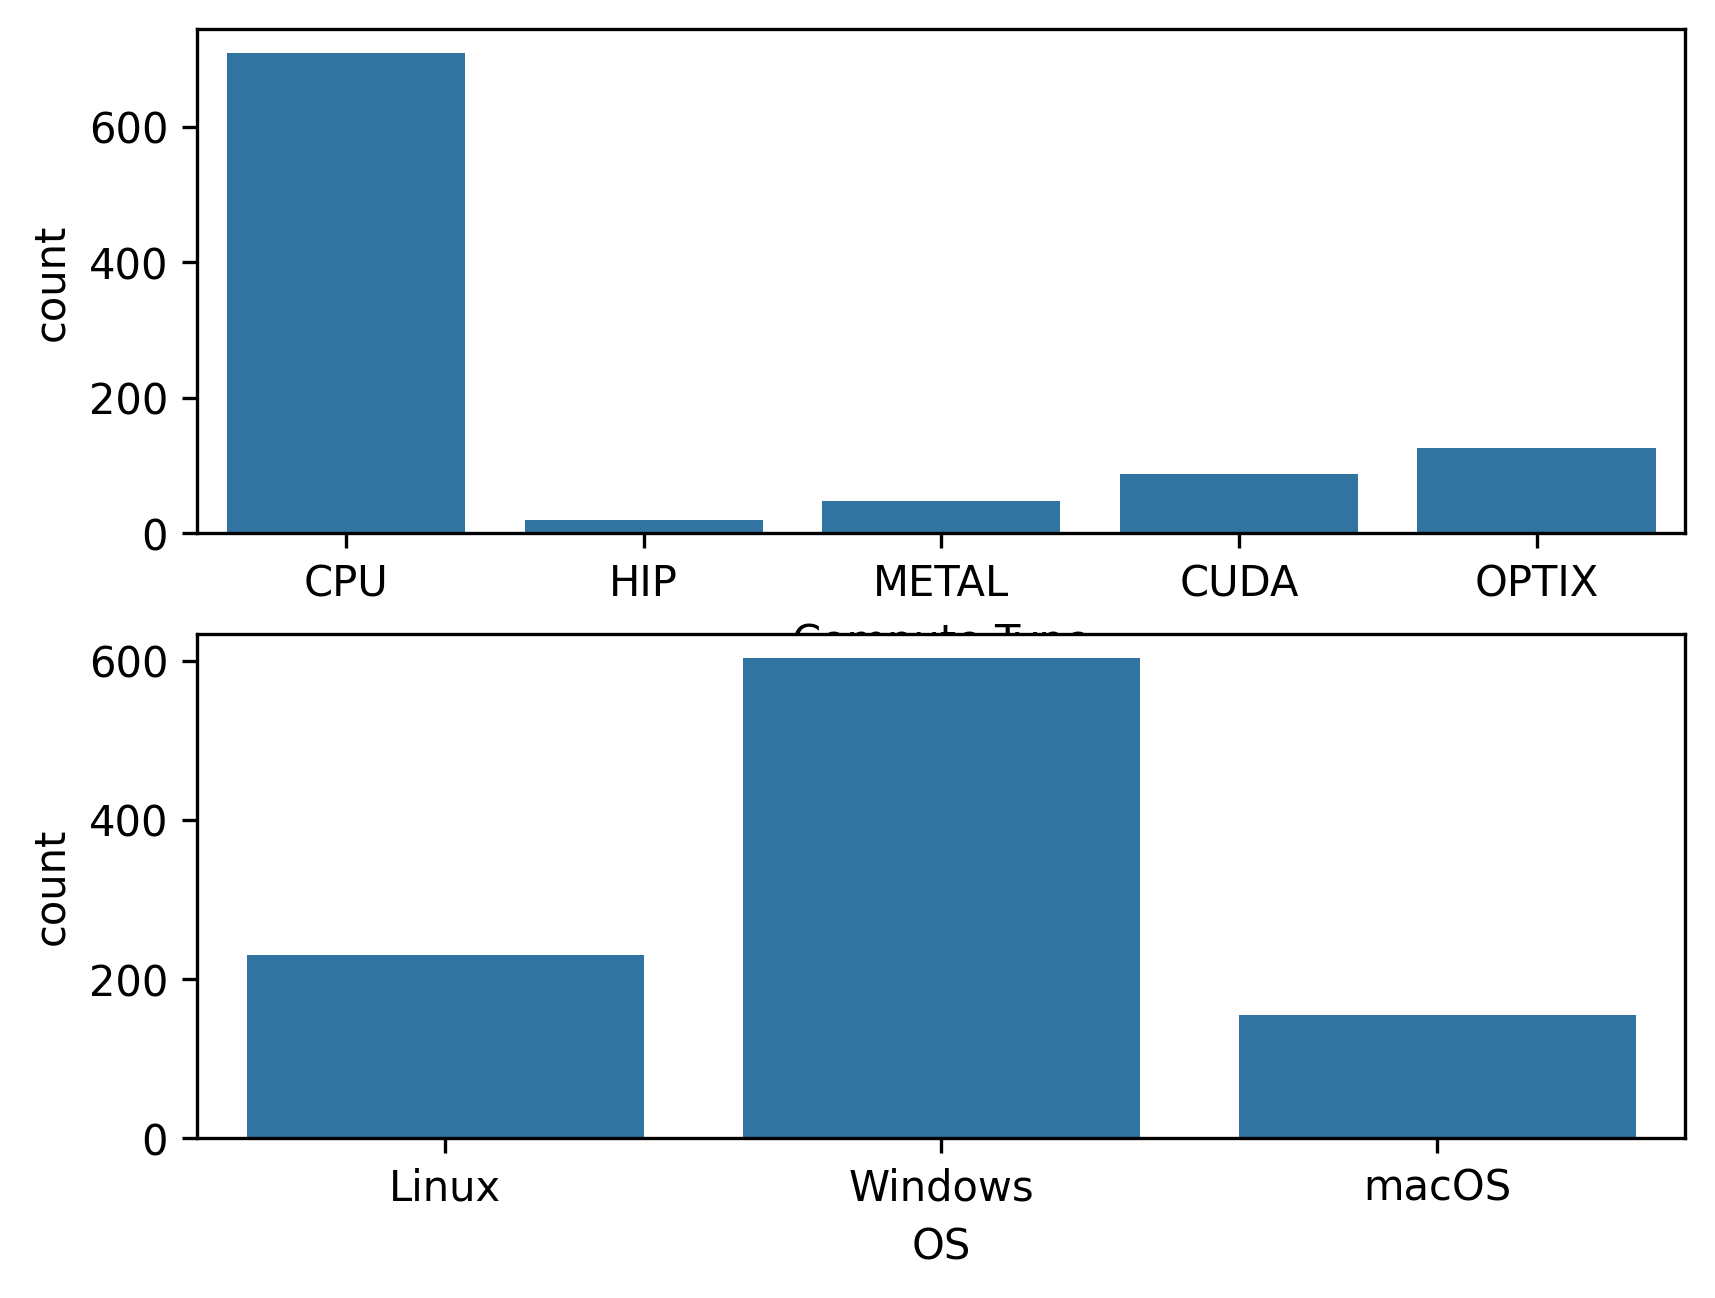

In [24]:
# 변경할 컬럼 범주 별 분포 확인 시각화
fig, ax = plt.subplots(nrows=2)

# Compute Type 컬럼 범주 별 분포
sns.countplot(x="Compute Type", data=df, ax=ax[0])

# OS 컬럼 범주 별 분포
sns.countplot(x="OS", data=df, ax=ax[1])

plt.show()

In [25]:
# 전체 컬럼 일괄 가변수 처리

df1 = pd.get_dummies(df)

df1.head()

# 특정 컬럼만 가변수 처리

df2 = pd.get_dummies(df, columns = ['Compute Type', 'OS']) # Compute Type, OS 컬럼만 가변수 처리

df2.head()

# 하나의 가변수 범주 제거 옵션 적용
df3 = pd.get_dummies(df, columns = ['Compute Type','OS'],drop_first=True) # drop_first=True 적용해 하나의 범주 제거 -> 다중공선성 문제 해결
df3.head()

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,False,False,False,False,False,False
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,False,False,False,False,True,False
2,2X 12th Gen Intel Core i9-12900KF,424.470,False,False,False,False,True,False
3,2X AMD EPYC 7343 16-Core Processor,439.210,False,False,False,False,False,False
4,2X AMD Opteron Processor 6276,81.478,False,False,False,False,True,False


In [28]:
df2.head()

,Device Name,Median Score,Compute Type_CPU,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Linux,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,True,False,False,False,False,True,False,False
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,True,False,False,False,False,False,True,False
2,2X 12th Gen Intel Core i9-12900KF,424.470,True,False,False,False,False,False,True,False
3,2X AMD EPYC 7343 16-Core Processor,439.210,True,False,False,False,False,True,False,False
4,2X AMD Opteron Processor 6276,81.478,True,False,False,False,False,False,True,False


In [ ]:
# 결측값을 별도의 컬럼으로 처리 옵션 적용

df4 = pd.get_dummies(df, columns = ['Compute Type','OS']
                     , drop_first=True, dummy_na=True) # 결측값을 별도의 컬럼으로 처리 -> dummy_na=True 옵션 적용

df4.head()

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,Compute Type_nan,OS_Windows,OS_macOS,OS_nan
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,False,False,False,False,False,False,False,False
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,False,False,False,False,False,True,False,False
2,2X 12th Gen Intel Core i9-12900KF,424.470,False,False,False,False,False,True,False,False
3,2X AMD EPYC 7343 16-Core Processor,439.210,False,False,False,False,False,False,False,False
4,2X AMD Opteron Processor 6276,81.478,False,False,False,False,False,True,False,False


### 클래스 불균형 문제 해결을 위한 언더샘플링과 오버샘플링  
클래스 불균형은 데이터에서 특정 클래스의 개수가 다른 클래스보다 훨씬 적거나 많은 경우 발생하는 문제   
이러한 불균형은 모델이 다수 클래스를 더 정확히 예측하도록 학습되는 경향을 초래하는는 소수 클래스의 에측 성능을 저하시킬 수 있음 

클래스 불균형 문제 해결 방법  

가중치 밸런싱 
  - 모델이 손실 함수를 계산할 때, 소수 클래스의 잘못된 예측에 더 큰 패널티를 부여 
  - 예를 들어, 10%의 구매 고객을 1개 틀리면 90% 비구매 고객 9개를 틀린 것과 동일한 손실로 계산  

언더샘플링 & 오버샘플링   
  - 데이터 불균형을 해결하는 가장 직접적인 방법은 데이터의 개수를 조정하는 것 
      - 언더샘플링: 다수 클래스의 데이터를 줄인다.
      - 오버샘플링: 소수 클래스의 데이터를 늘린다.  
  
  - 오버샘플링 기법
    - SMOTE
      - 소수 클래스 데이터를 단순 복제하는 것이 아니라, KNN을 활용해 새로운 데이터를 생성


In [30]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.dpi'] = 300

In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dragonheir/logistic-regression")

print("Path to dataset files:", path)

df = pd.read_csv("C:/Users/KimDongyoung/.cache/kagglehub/datasets/dragonheir/logistic-regression/versions/1/Social_Network_Ads.csv")

Path to dataset files: C:\Users\KimDongyoung\.cache\kagglehub\datasets\dragonheir\logistic-regression\versions\1


In [32]:
# 데이터 샘플 확인
df.head()

# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


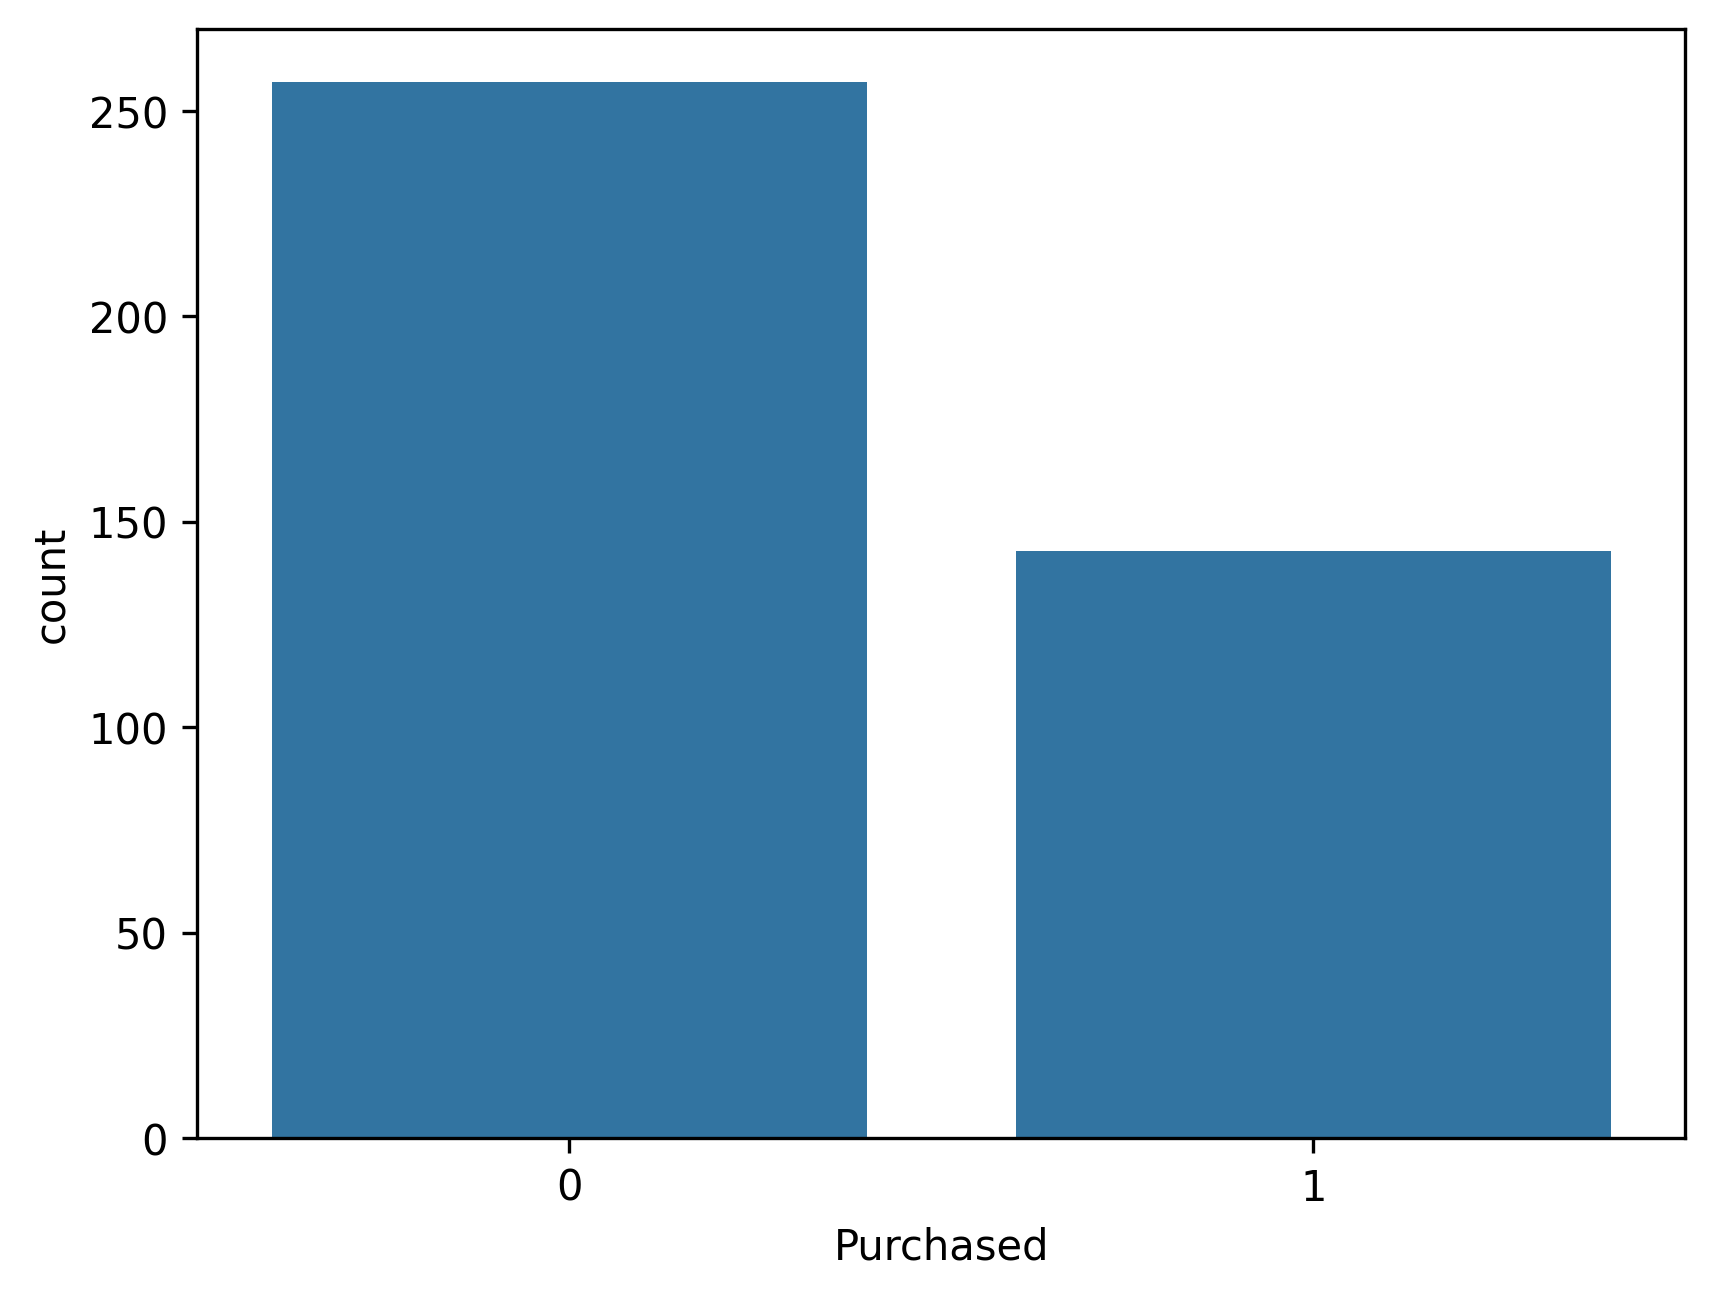

In [33]:
# Purchased 컬럼 클래스 분포 시각화
sns.countplot(x="Purchased", data=df)

plt.show()

In [36]:
# Gender 컬럼 가변수 처리

df_d = pd.get_dummies(df['Gender'])

df2 = pd.merge(df.drop(['Gender'], axis=1), 
               df_d['Male'],left_index=True, right_index=True,how = 'inner')

df2.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True


In [38]:
# 데이터셋 학습셋, 테스트셋 분리

X = df2.drop(['Purchased'], axis=1)
y = df2[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25,random_state=10)

X_train.head()

,User ID,Age,EstimatedSalary,Male
57,15807481,28,79000,True
87,15631912,28,85000,False
357,15671387,41,72000,False
355,15606472,60,34000,True
238,15617877,46,82000,False


RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (300, 4) (300, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (224, 4) (224, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 Purchased
0    188
1    112
Name: count, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 Purchased
0    112
1    112
Name: count, dtype: int64


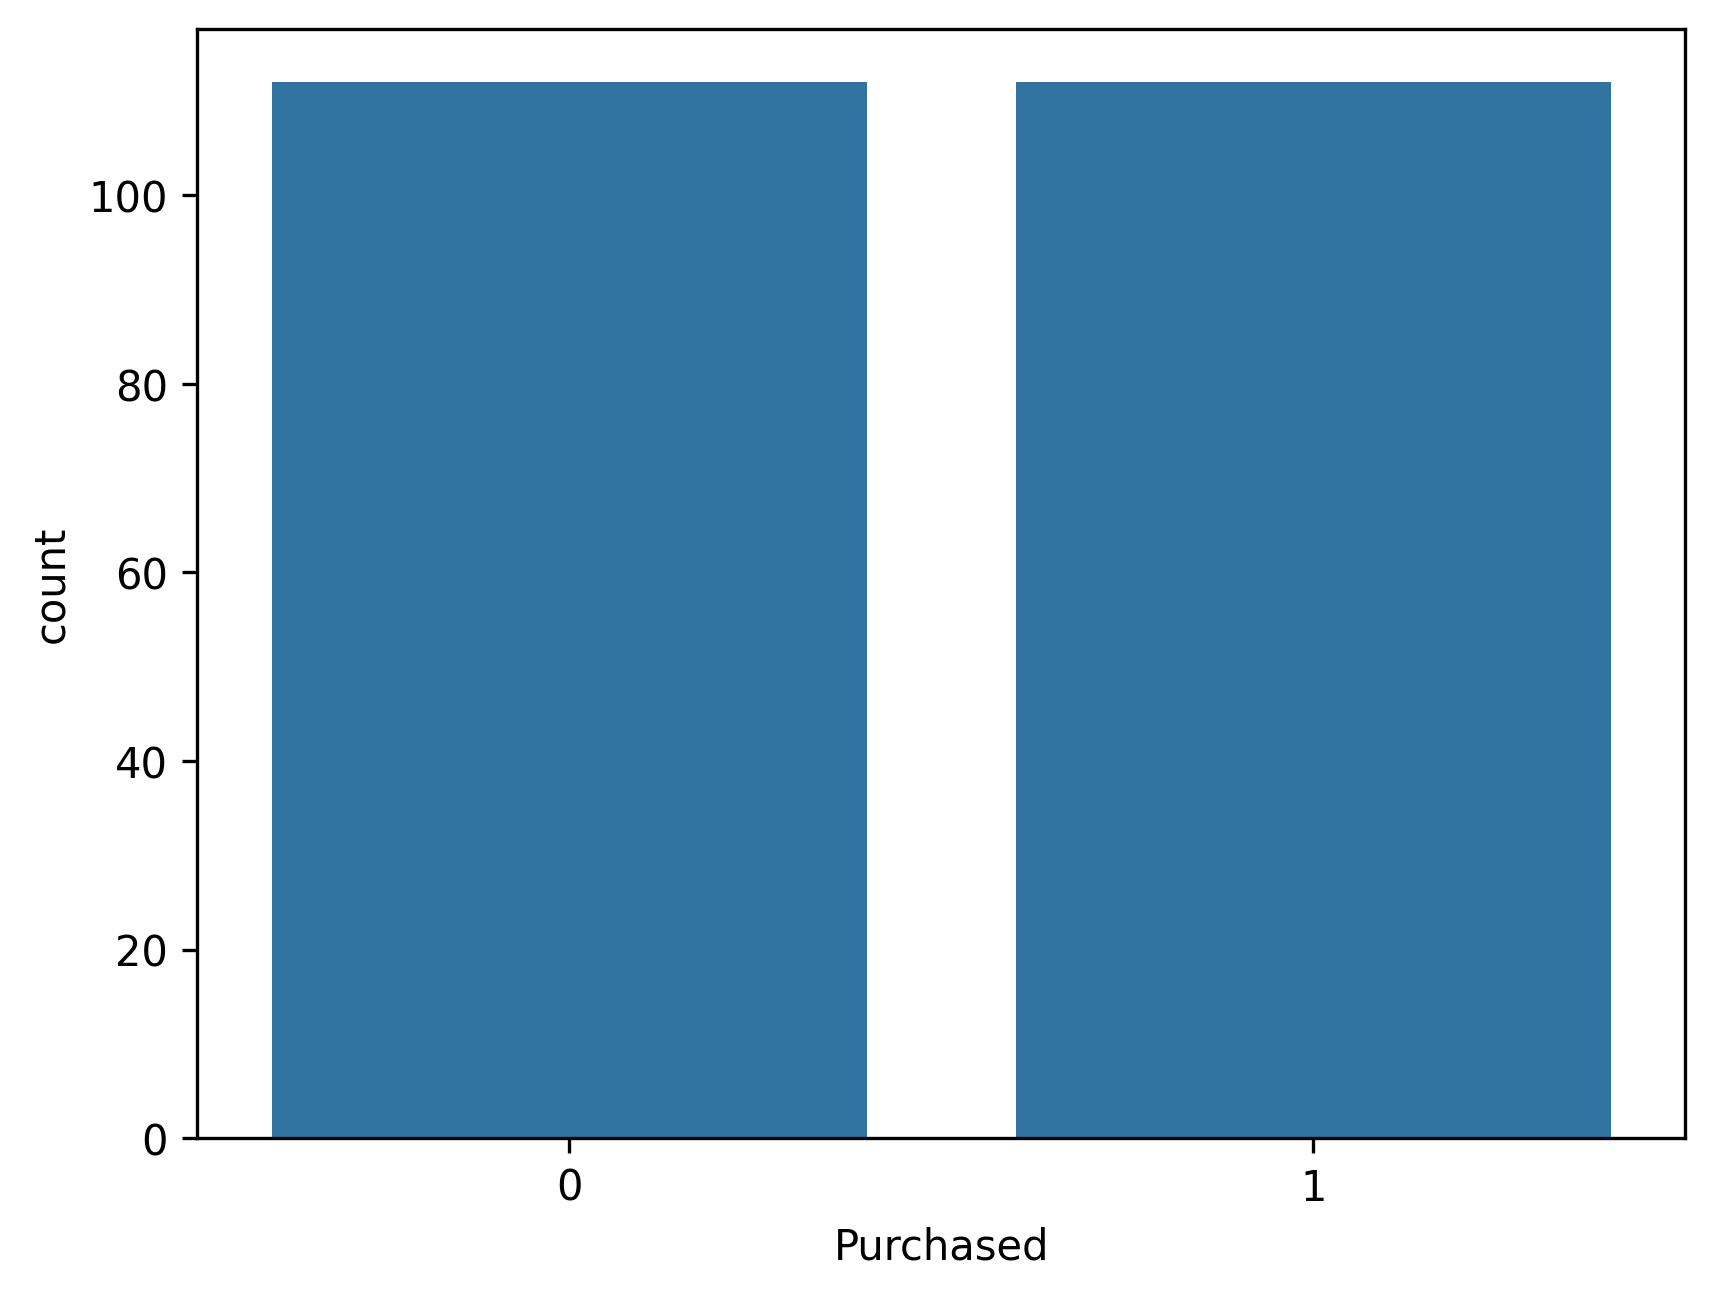

In [39]:
# 언더샘플링 적용

X_train_under, y_train_under = RandomUnderSampler(
    random_state=0).fit_resample(X_train,y_train)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: '
      , X_train.shape, y_train.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
      , X_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train['Purchased']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_under['Purchased']).value_counts())


# 언더샘플링 적용 후 Purchased 컬럼 클래스 분포 시각화
sns.countplot(x="Purchased", data=y_train_under)

plt.show()

SMOTE 적용 전 학습용 변수/레이블 데이터 세트:  (300, 4) (300, 1)
SMOTE 적용 후 학습용 변수/레이블 데이터 세트:  (376, 4) (376, 1)
SMOTE 적용 전 레이블 값 분포: 
 Purchased
0    188
1    112
Name: count, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 Purchased
0    188
1    188
Name: count, dtype: int64


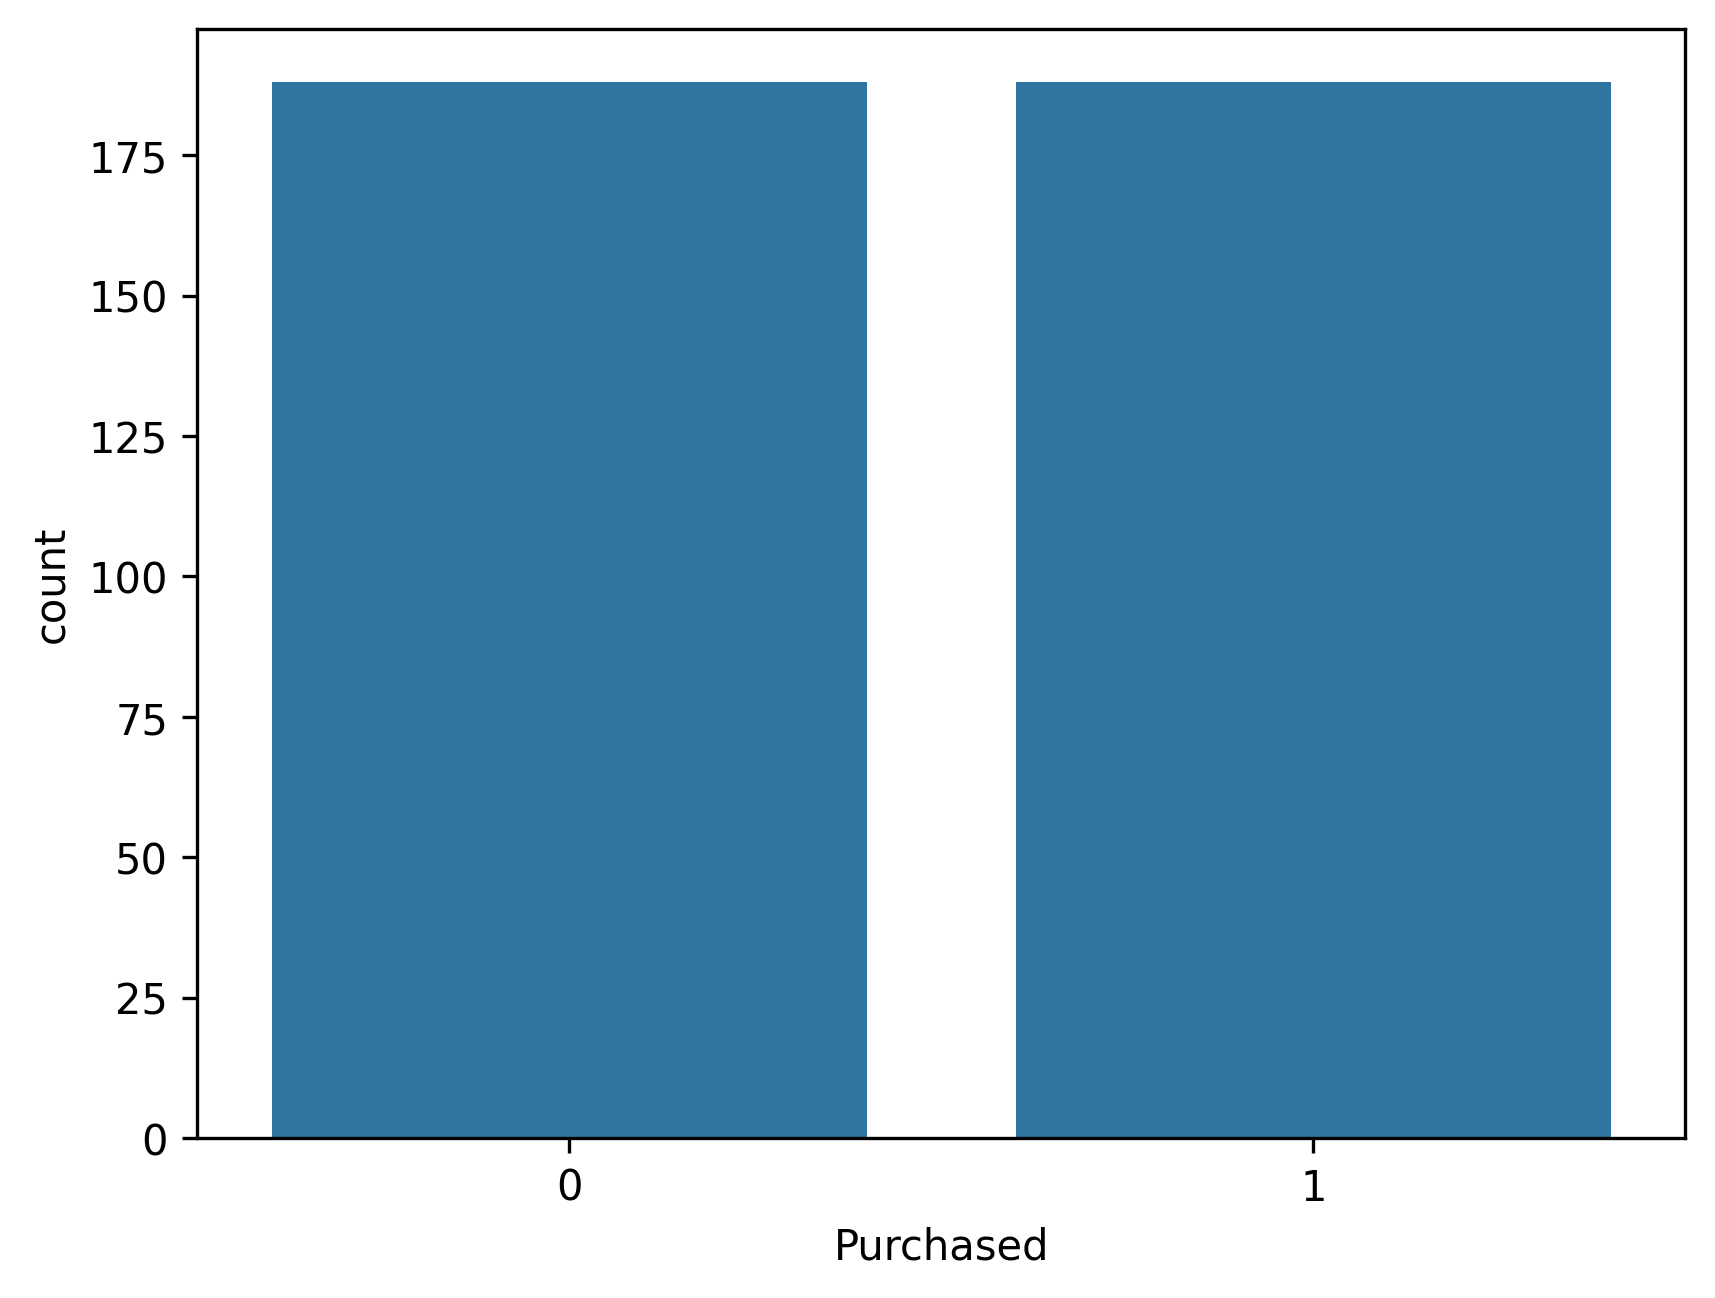

In [41]:
# 오버샘플링 적용

smote = SMOTE(k_neighbors = 2, random_state=0)
oversample = SMOTE()

X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 변수/레이블 데이터 세트: '
      , X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 변수/레이블 데이터 세트: '
      , X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train['Purchased']).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_over['Purchased']).value_counts())


# 오버샘플링 적용 후 Purchased 컬럼 클래스 분포 시각화
sns.countplot(x="Purchased", data=y_train_over)

plt.show()

In [42]:
y_train.info() # 원본 데이터셋 Purchased 컬럼 클래스 분포

X_train_under.info() # 언더샘플링 적용 후 Purchased 컬럼 클래스 분포

X_train_over.info() # 오버샘플링 적용 후 Purchased 컬럼 클래스 분포

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 57 to 265
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Purchased  300 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 327 to 265
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          224 non-null    int64
 1   Age              224 non-null    int64
 2   EstimatedSalary  224 non-null    int64
 3   Male             224 non-null    bool 
dtypes: bool(1), int64(3)
memory usage: 7.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          376 non-null    int64
 1   Age              376 non-null    int64
 2   EstimatedSalary  376 non-null    int64
 3   Male   

### 데이터 거리 측정 방법   
데이터 거리 측정의의 필요성
  - 데이터 유사성 분석이 중요한 이유
    - 군집 분석: 비슷한 데이터를 그룹으로 묶기 위해 거리 계산
    - KNN: 가장 가까운 데이터 포인트를 찾아 분류/회귀 예측
    - 추천 시스템: 사용자 선호도가 유사한 아이템을 추천하는데 활용  
  
유클리드 거리
  - 가장 기본적인 거리 측정 방법
    - 두 점 사이의 직선 거리(피타고라스 정리 이용)
    - 값이 작을수록 두 데이터가 유사함을 의미
    - KNN, K-Means 군집 분석 등에서 기본적으로 사용
    - L2 Norm은 유클리드 거리 

맨해튼 거리
  - 격자 형태의 도로망에서 최단 경로를 구할 때 사용
  - L1 Norm은 맨해튼 거리 

민코프스키 거리
  - 유클리드 거리와 맨해튼 거리의 일반화된 형태
  - p값을 조정하여 다양한 거리 측정 방식으로 변형 가능
  - p = 1 -> 맨해튼 거리, p=2 -> 유클리드 거리
  - p값이 커질수록 유클리드 거리와 유사해지고, 작아질수록 맨해튼 거리에 가까워짐    

마할라노비스 거리
  - 유클리드 거리와 다르게 공분산을 고려한 거리 측정 방법
  - 변수 간의 분산과 공분산을 모두 반영하여 거리 계산
  - 데이터의 분포를 반영하여 이상치를 탐지하는 데 유용
  - 확률 분포를 고려하여 공분산 행렬을 사용
  - 데이터가 상관관계를 가질 경우, 해당 상관성을 반영하여 거리 조정   

  마할라노비스 거리의 활용   
    - 이상치 탐지   
      - 확률 분포에서 벗어나는 점을 탐지할 때 사용  
      - 비정상적인 금융 거래 탐지, 제품 불량 감지 등에 활용   
    - 다변량 분석   
    - 군집 분석

코사인 거리
  - 코사인 유사도를 기반으로 한 거리 측정 방법
  - 유클리드 거리처럼 크기 자체를 비교하지 않고, 벡터 간의 각도를 기반으로 유사도를 측정
  - 유사도가 높을수록 코사인 거리는 작아진다.
  - 추천 시스템, 문서 유사도 분석, 검색 엔진에서 활용 

In [46]:
from scipy.spatial import distance 
import pandas as pd

In [43]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sewonghwang/starbucks-seoul")

print("Path to dataset files:", path)

100%|██████████| 21.4k/21.4k [00:00<00:00, 2.80MB/s]

Extracting files...
Path to dataset files: C:\Users\KimDongyoung\.cache\kagglehub\datasets\sewonghwang\starbucks-seoul\versions\1


In [44]:
df = pd.read_csv("C:/Users/KimDongyoung/.cache/kagglehub/datasets/sewonghwang/starbucks-seoul/versions/1/starbucks_seoul.csv")

In [45]:
df.tail()

,name,address,gu_name,latitude,longitude
516,황학사거리,"서울특별시 성동구 왕십리로 410 (하왕십리동, 센트라스)",성동구,37.567644,127.023697
517,황학캐슬,서울특별시 중구 청계천로 400 (황학동) 롯데캐슬베네치아,중구,37.571240,127.022905
518,회기역사거리,서울특별시 동대문구 이문로 37 (회기동),동대문구,37.590784,127.056098
519,회현역,서울특별시 중구 퇴계로 72 (회현동) 리더스뷰남산,중구,37.558981,126.980747
520,효창공원앞역,"서울특별시 용산구 백범로 313 (효창동, 용산 롯데캐슬 센터포레)",용산구,37.539305,126.963060


스타벅스 지점 간 거리

In [ ]:
# 금천구 스타벅스만 샘플링
df1 = df[(df['gu_name']=='금천구')]

df1


# 유클리디안 거리

dist_euclidean = distance.cdist(df1[['latitude','longitude']], 
                                df1[['latitude','longitude']], metric='euclidean') # metric='euclidean' : 유클리디안 거리 계산

# 컬럼명, 인덱스 설정
dist_euclidean = pd.DataFrame(data=dist_euclidean, columns=df1['name'])
dist_euclidean.set_index(df1['name'],inplace=True)

dist_euclidean

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.002155,0.005775,0.005608,0.004009,0.007852,0.011124,0.032598,0.012507,0.002964
가산그레이트,0.002155,0.000000,0.004992,0.004146,0.004400,0.007004,0.012909,0.034596,0.013808,0.002515
가산디지털,0.005775,0.004992,0.000000,0.001963,0.002869,0.002081,0.016639,0.037442,0.018280,0.002815
가산디지털단지역,0.005608,0.004146,0.001963,0.000000,0.004104,0.003287,0.016731,0.038024,0.017921,0.002926
가산브이타워,0.004009,0.004400,0.002869,0.004104,0.000000,0.004604,0.014107,0.034613,0.016136,0.002032
가산에스케이,0.007852,0.007004,0.002081,0.003287,0.004604,0.000000,0.018628,0.039175,0.020353,0.004895
금천독산,0.011124,0.012909,0.016639,0.016731,0.014107,0.018628,0.000000,0.021998,0.004252,0.013959
금천시흥,0.032598,0.034596,0.037442,0.038024,0.034613,0.039175,0.021998,0.000000,0.023308,0.035107
독산사거리,0.012507,0.013808,0.018280,0.017921,0.016136,0.020353,0.004252,0.023308,0.000000,0.015471


In [48]:
# 맨하튼 거리

dist_manhattan = distance.cdist(df1[['latitude','longitude']], 
                                df1[['latitude','longitude']], metric='cityblock') 

# 컬럼명, 인덱스 설정
dist_manhattan = pd.DataFrame(data=dist_manhattan, columns=df1['name'])
dist_manhattan.set_index(df1['name'],inplace=True)

dist_manhattan

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.002358,0.007721,0.007931,0.004092,0.010429,0.015720,0.044173,0.016878,0.004011
가산그레이트,0.002358,0.000000,0.005363,0.005573,0.006022,0.008071,0.018078,0.046531,0.019236,0.003149
가산디지털,0.007721,0.005363,0.000000,0.002769,0.003797,0.002708,0.023441,0.051894,0.024599,0.003710
가산디지털단지역,0.007931,0.005573,0.002769,0.000000,0.004199,0.003920,0.023651,0.052104,0.024809,0.003920
가산브이타워,0.004092,0.006022,0.003797,0.004199,0.000000,0.006505,0.019644,0.048097,0.020802,0.002873
가산에스케이,0.010429,0.008071,0.002708,0.003920,0.006505,0.000000,0.026149,0.054602,0.027307,0.006418
금천독산,0.015720,0.018078,0.023441,0.023651,0.019644,0.026149,0.000000,0.028453,0.005900,0.019731
금천시흥,0.044173,0.046531,0.051894,0.052104,0.048097,0.054602,0.028453,0.000000,0.027295,0.048184
독산사거리,0.016878,0.019236,0.024599,0.024809,0.020802,0.027307,0.005900,0.027295,0.000000,0.020889


In [49]:
# 민코프스키 거리

dist_minkowski = distance.cdist(df1[['latitude','longitude']], 
                                df1[['latitude','longitude']],  metric='minkowski', p=1.5) 

# 컬럼명, 인덱스 설정
dist_minkowski = pd.DataFrame(data=dist_minkowski, columns=df1['name'])
dist_minkowski.set_index(df1['name'],inplace=True)

dist_minkowski

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.002189,0.006310,0.006295,0.004016,0.008554,0.012482,0.035842,0.013725,0.003257
가산그레이트,0.002189,0.000000,0.005048,0.004541,0.004860,0.007222,0.014420,0.037907,0.015384,0.002672
가산디지털,0.006310,0.005048,0.000000,0.002201,0.003121,0.002247,0.018641,0.041612,0.020034,0.003056
가산디지털단지역,0.006295,0.004541,0.002201,0.000000,0.004113,0.003428,0.018776,0.042028,0.019906,0.003200
가산브이타워,0.004016,0.004860,0.003121,0.004113,0.000000,0.005165,0.015714,0.038516,0.017351,0.002281
가산에스케이,0.008554,0.007222,0.002247,0.003428,0.005165,0.000000,0.020832,0.043657,0.022276,0.005302
금천독산,0.012482,0.014420,0.018641,0.018776,0.015714,0.020832,0.000000,0.023688,0.004728,0.015664
금천시흥,0.035842,0.037907,0.041612,0.042028,0.038516,0.043657,0.023688,0.000000,0.024159,0.038834
독산사거리,0.013725,0.015384,0.020034,0.019906,0.017351,0.022276,0.004728,0.024159,0.000000,0.016982


In [50]:
# 체비쇼프 거리

dist_chebyshev = distance.cdist(df1[['latitude','longitude']], 
                                df1[['latitude','longitude']],  metric='chebyshev') 

# 컬럼명, 인덱스 설정
dist_chebyshev = pd.DataFrame(data=dist_chebyshev, columns=df1['name'])
dist_chebyshev.set_index(df1['name'],inplace=True)

dist_chebyshev

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.002144,0.005191,0.004019,0.004008,0.007121,0.008165,0.028681,0.011084,0.002615
가산그레이트,0.002144,0.000000,0.004977,0.003698,0.003794,0.006907,0.010309,0.030825,0.011298,0.002401
가산디지털,0.005191,0.004977,0.000000,0.001489,0.002614,0.001930,0.012746,0.031211,0.016275,0.002576
가산디지털단지역,0.004019,0.003698,0.001489,0.000000,0.004103,0.003209,0.012184,0.032700,0.014996,0.002623
가산브이타워,0.004008,0.003794,0.002614,0.004103,0.000000,0.003392,0.011563,0.028597,0.015092,0.001480
가산에스케이,0.007121,0.006907,0.001930,0.003209,0.003392,0.000000,0.014676,0.031989,0.018205,0.004506
금천독산,0.008165,0.010309,0.012746,0.012184,0.011563,0.014676,0.000000,0.020516,0.003529,0.010170
금천시흥,0.028681,0.030825,0.031211,0.032700,0.028597,0.031989,0.020516,0.000000,0.022887,0.030077
독산사거리,0.011084,0.011298,0.016275,0.014996,0.015092,0.018205,0.003529,0.022887,0.000000,0.013699


In [51]:
# 마할라노비스 거리

dist_mahalanobis = distance.cdist(df1[['latitude','longitude']], 
                                  df1[['latitude','longitude']],  metric='mahalanobis') 

# 컬럼명, 인덱스 설정
dist_mahalanobis = pd.DataFrame(data=dist_mahalanobis, columns=df1['name'])
dist_mahalanobis.set_index(df1['name'],inplace=True)

dist_mahalanobis

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000,0.412222,1.008327,0.534635,1.137676,1.408515,1.021456,3.181956,2.092650,0.489261
가산그레이트,0.412222,0.000000,1.320538,0.706980,1.502236,1.716643,1.095370,3.520033,1.851829,0.817487
가산디지털,1.008327,1.320538,0.000000,0.658912,0.317804,0.400714,1.900196,3.251106,3.100708,0.519729
가산디지털단지역,0.534635,0.706980,0.658912,0.000000,0.911016,1.035496,1.554849,3.489268,2.550268,0.304243
가산브이타워,1.137676,1.502236,0.317804,0.911016,0.000000,0.420369,1.900563,2.976769,3.197236,0.687926
가산에스케이,1.408515,1.716643,0.400714,1.035496,0.420369,0.000000,2.271659,3.340112,3.500299,0.920369
금천독산,1.021456,1.095370,1.900196,1.554849,1.900563,2.271659,0.000000,2.709650,1.458239,1.434991
금천시흥,3.181956,3.520033,3.251106,3.489268,2.976769,3.340112,2.709650,0.000000,3.913709,3.194173
독산사거리,2.092650,1.851829,3.100708,2.550268,3.197236,3.500299,1.458239,3.913709,0.000000,2.581894


In [52]:
# 코사인 거리

dist_cosine = distance.cdist(df1[['latitude','longitude']], 
                             df1[['latitude','longitude']],  metric='cosine') 

# 컬럼명, 인덱스 설정
dist_cosine = pd.DataFrame(data=dist_cosine, columns=df1['name'])
dist_cosine.set_index(df1['name'],inplace=True)

dist_cosine

name,W-Mall,가산그레이트,가산디지털,가산디지털단지역,가산브이타워,가산에스케이,금천독산,금천시흥,독산사거리,마리오아울렛
name,,,,,,,,,,
W-Mall,0.000000e+00,1.279999e-10,4.336818e-10,7.034265e-10,3.177569e-11,7.693567e-10,2.839378e-09,2.905348e-08,2.159871e-09,1.235210e-10
가산그레이트,1.279999e-10,0.000000e+00,9.046519e-11,2.312978e-10,3.222489e-11,2.697336e-10,4.173098e-09,3.303833e-08,3.339466e-09,3.974598e-14
가산디지털,4.336818e-10,9.046519e-11,0.000000e+00,3.245748e-11,2.306766e-10,4.777923e-11,5.492417e-09,3.658644e-08,4.529214e-09,9.430401e-11
가산디지털단지역,7.034265e-10,2.312978e-10,3.245748e-11,0.000000e+00,4.361916e-10,1.476264e-12,6.369318e-09,3.879836e-08,5.328503e-09,2.374124e-10
가산브이타워,3.177569e-11,3.222489e-11,2.306766e-10,4.361916e-10,0.000000e+00,4.884231e-10,3.471896e-09,3.100691e-08,2.715597e-09,2.999756e-11
가산에스케이,7.693567e-10,2.697336e-10,4.777923e-11,1.476264e-12,4.884231e-10,0.000000e+00,6.564742e-09,3.927851e-08,5.507374e-09,2.763336e-10
금천독산,2.839378e-09,4.173098e-09,5.492417e-09,6.369318e-09,3.471896e-09,6.564742e-09,0.000000e+00,1.372763e-08,4.639511e-11,4.147336e-09
금천시흥,2.905348e-08,3.303833e-08,3.658644e-08,3.879836e-08,3.100691e-08,3.927851e-08,1.372763e-08,0.000000e+00,1.537015e-08,3.296578e-08
독산사거리,2.159871e-09,3.339466e-09,4.529214e-09,5.328503e-09,2.715597e-09,5.507374e-09,4.639511e-11,1.537015e-08,0.000000e+00,3.316424e-09
